In [2]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('Ev_sales.csv')

In [7]:
df

,Year,Month_Name,Date,State,Vehicle_Category,EV_Sales_Quantity
0,2014,jan,01-01-2014,Andhra Pradesh,Others,0
1,2014,jan,01-01-2014,Andhra Pradesh,Others,0
2,2014,jan,01-01-2014,Andhra Pradesh,Others,0
3,2014,jan,01-01-2014,Andhra Pradesh,Others,0
4,2014,jan,01-01-2014,Andhra Pradesh,Bus,0
...,...,...,...,...,...,...
96840,2023,dec,12-01-2023,Andaman & Nicobar Island,4-Wheelers,1
96841,2023,dec,12-01-2023,Andaman & Nicobar Island,2-Wheelers,5
96842,2023,dec,12-01-2023,Andaman & Nicobar Island,Bus,0
96843,2023,dec,12-01-2023,Andaman & Nicobar Island,3-Wheelers,0


In [9]:
df.shape

(96845, 6)

In [10]:
df.info

<bound method DataFrame.info of        Year Month_Name        Date                     State Vehicle_Category  \
0      2014        jan  01-01-2014            Andhra Pradesh           Others   
1      2014        jan  01-01-2014            Andhra Pradesh           Others   
2      2014        jan  01-01-2014            Andhra Pradesh           Others   
3      2014        jan  01-01-2014            Andhra Pradesh           Others   
4      2014        jan  01-01-2014            Andhra Pradesh              Bus   
...     ...        ...         ...                       ...              ...   
96840  2023        dec  12-01-2023  Andaman & Nicobar Island       4-Wheelers   
96841  2023        dec  12-01-2023  Andaman & Nicobar Island       2-Wheelers   
96842  2023        dec  12-01-2023  Andaman & Nicobar Island              Bus   
96843  2023        dec  12-01-2023  Andaman & Nicobar Island       3-Wheelers   
96844  2023        dec  12-01-2023  Andaman & Nicobar Island       3-Wheelers

In [11]:
df.columns.tolist()

['Year',
 'Month_Name',
 'Date',
 'State',
 'Vehicle_Category',
 'EV_Sales_Quantity']

In [13]:
df.dtypes

Year                  int64
Month_Name           object
Date                 object
State                object
Vehicle_Category     object
EV_Sales_Quantity     int64
dtype: object

In [14]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Category,EV_Sales_Quantity
0,2014,jan,01-01-2014,Andhra Pradesh,Others,0
1,2014,jan,01-01-2014,Andhra Pradesh,Others,0
2,2014,jan,01-01-2014,Andhra Pradesh,Others,0
3,2014,jan,01-01-2014,Andhra Pradesh,Others,0
4,2014,jan,01-01-2014,Andhra Pradesh,Bus,0


In [15]:
df.isna().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Category     0
EV_Sales_Quantity    0
dtype: int64

In [17]:
df.duplicated().sum()

64581

In [20]:
df['Date_parsed'] = pd.to_datetime(df['Date'], errors = 'coerce')

In [21]:
print("NaT count (failed parses):", df['Date_parsed'].isna().sum())
print(df[['Date', 'Date_parsed']].head(10))

NaT count (failed parses): 0
         Date Date_parsed
0  01-01-2014  2014-01-01
1  01-01-2014  2014-01-01
2  01-01-2014  2014-01-01
3  01-01-2014  2014-01-01
4  01-01-2014  2014-01-01
5  01-01-2014  2014-01-01
6  01-01-2014  2014-01-01
7  01-01-2014  2014-01-01
8  01-01-2014  2014-01-01
9  01-01-2014  2014-01-01


In [22]:
Before_remove = len(df)
df = df.drop_duplicates().copy()
after_remove = len(df)

In [27]:
print(f"Before removing duplicates: {Before_remove}")
print(f"Remaining rows after duplicates removed: {after_remove}")

Before removing duplicates: 96845
Remaining rows after duplicates removed: 32264


In [28]:
for col in ['State','Vehicle_Category','Month_Name']:
    df[col] = df[col].astype(str).str.strip().str.title()

print(df[['State','Vehicle_Category','Month_Name']].head())


             State Vehicle_Category Month_Name
0   Andhra Pradesh           Others        Jan
4   Andhra Pradesh              Bus        Jan
13  Andhra Pradesh       2-Wheelers        Jan
14  Andhra Pradesh       4-Wheelers        Jan
19  Andhra Pradesh       3-Wheelers        Jan


In [29]:
print(df.isnull().sum())

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Category     0
EV_Sales_Quantity    0
Date_parsed          0
dtype: int64


In [30]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Category,EV_Sales_Quantity,Date_parsed
0,2014,Jan,01-01-2014,Andhra Pradesh,Others,0,2014-01-01
4,2014,Jan,01-01-2014,Andhra Pradesh,Bus,0,2014-01-01
13,2014,Jan,01-01-2014,Andhra Pradesh,2-Wheelers,1,2014-01-01
14,2014,Jan,01-01-2014,Andhra Pradesh,4-Wheelers,0,2014-01-01
19,2014,Jan,01-01-2014,Andhra Pradesh,3-Wheelers,0,2014-01-01


In [34]:
df = df.drop(columns=['Date'])

In [35]:
df.head()

,Year,Month_Name,State,Vehicle_Category,EV_Sales_Quantity,Date_parsed
0,2014,Jan,Andhra Pradesh,Others,0,2014-01-01
4,2014,Jan,Andhra Pradesh,Bus,0,2014-01-01
13,2014,Jan,Andhra Pradesh,2-Wheelers,1,2014-01-01
14,2014,Jan,Andhra Pradesh,4-Wheelers,0,2014-01-01
19,2014,Jan,Andhra Pradesh,3-Wheelers,0,2014-01-01


In [36]:
df.to_csv("Ev_sales_cleaned.csv", index = False)
print("Cleaned dataset saved: Ev_sales_cleaned.csv")

Cleaned dataset saved: Ev_sales_cleaned.csv


In [43]:
# total sales
total = df['EV_Sales_Quantity'].sum()
print("Total EV units:", total)


Total EV units: 3592576


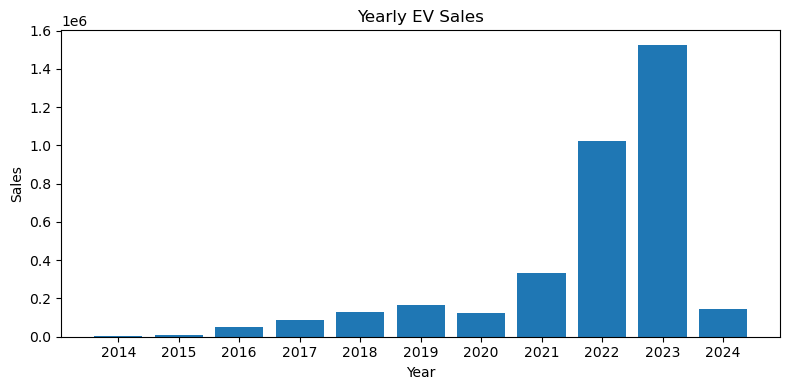

    Year  EV_Sales_Quantity
0   2014               2364
1   2015               7756
2   2016              49827
3   2017              87344
4   2018             130078
5   2019             166729
6   2020             124587
7   2021             331403
8   2022            1024448
9   2023            1524859
10  2024             143181


In [39]:
# by year
# yearly bar (one figure)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.bar(sales_by_year['Year'].astype(str), sales_by_year['EV_Sales_Quantity'])
plt.title("Yearly EV Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig("yearly_sales.png")
plt.show()
sales_by_year = df.groupby('Year', as_index=False)['EV_Sales_Quantity'].sum().sort_values('Year')
print(sales_by_year)


            State  EV_Sales_Quantity
31  Uttar Pradesh             732064
19    Maharashtra             401526
15      Karnataka             315334
7           Delhi             268529
27      Rajasthan             228532
4           Bihar             213396
29     Tamil Nadu             206857
10        Gujarat             176568
3           Assam             151829
16         Kerala             133192


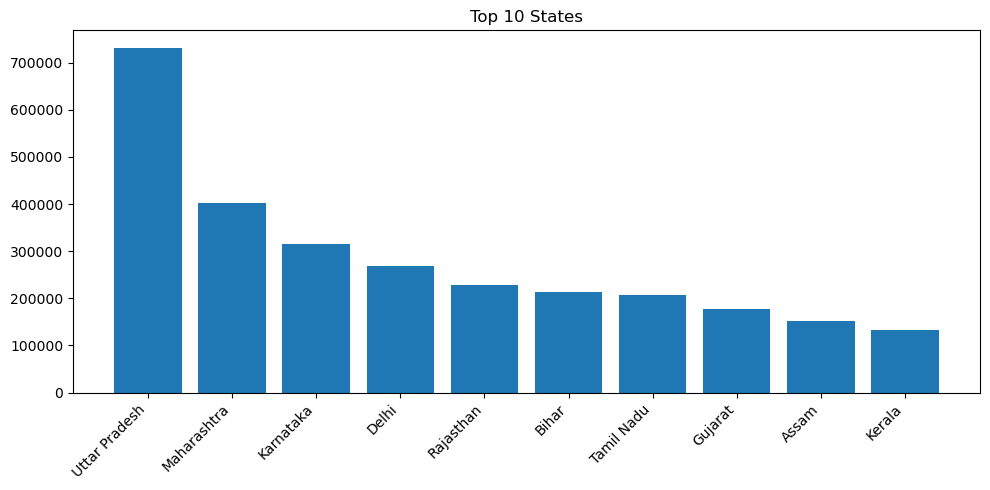

In [40]:
# by state (top 10)
sales_by_state = df.groupby('State', as_index=False)['EV_Sales_Quantity'].sum().sort_values('EV_Sales_Quantity', ascending=False)
print(sales_by_state.head(10))

# top states
plt.figure(figsize=(10,5))
top10 = sales_by_state.head(10)
plt.bar(top10['State'], top10['EV_Sales_Quantity'])
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 States")
plt.tight_layout()
plt.savefig("top10_states.png")
plt.show()

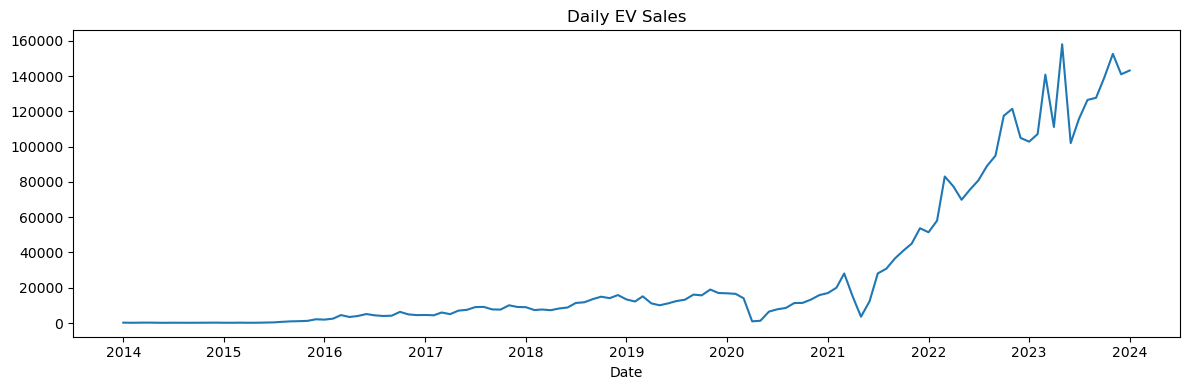

In [41]:
# daily time series
ts = df.groupby('Date_parsed', as_index=False)['EV_Sales_Quantity'].sum().sort_values('Date_parsed')
# time series
plt.figure(figsize=(12,4))
plt.plot(ts['Date_parsed'], ts['EV_Sales_Quantity'])
plt.title("Daily EV Sales")
plt.xlabel("Date")
plt.tight_layout()
plt.savefig("daily_ts.png")
plt.show()



In [ ]:
# by vehicle category
sales_by_cat = df.groupby('Vehicle_Category', as_index=False)['EV_Sales_Quantity'].sum().sort_values('EV_Sales_Quantity', ascending=False)
print(sales_by_cat)